number: /home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/calibration8.jpg ret =  True


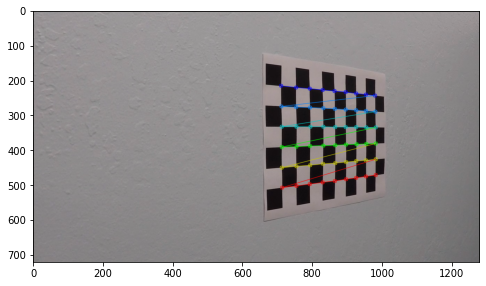

number: /home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/calibration18.jpg ret =  True


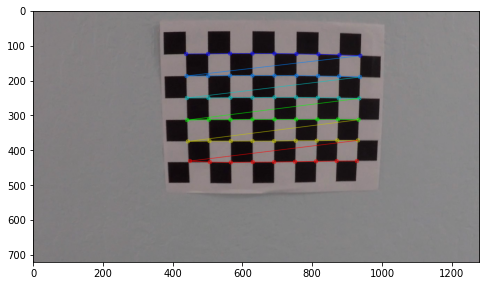

number: /home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/calibration16.jpg ret =  True


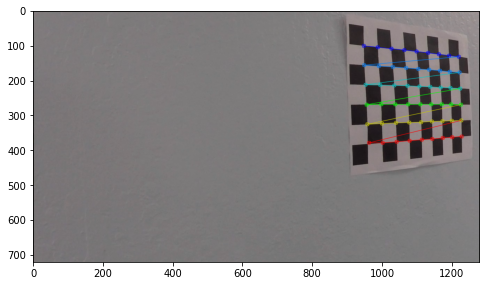

number: /home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/calibration1.jpg ret =  False
number: /home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/calibration20.jpg ret =  True


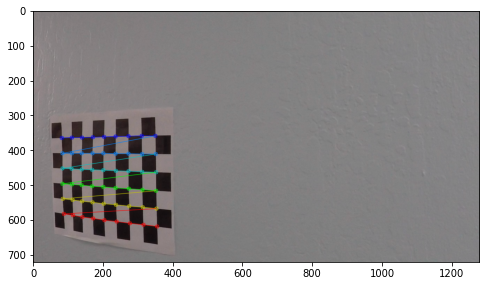

number: /home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/calibration11.jpg ret =  True


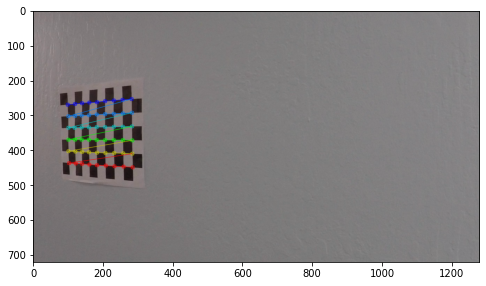

number: /home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/calibration9.jpg ret =  True


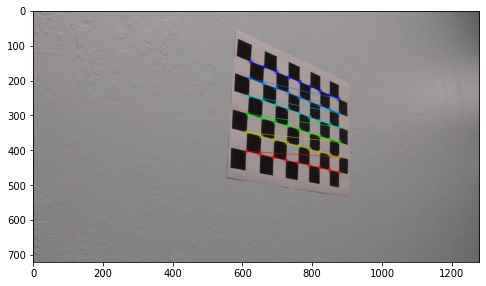

number: /home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/calibration2.jpg ret =  True


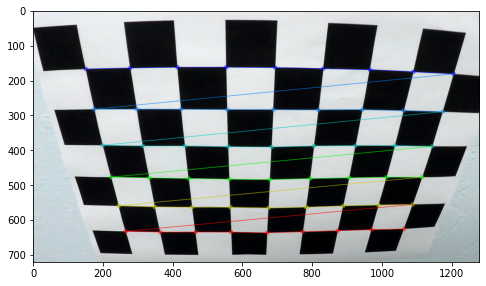

number: /home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/calibration10.jpg ret =  True


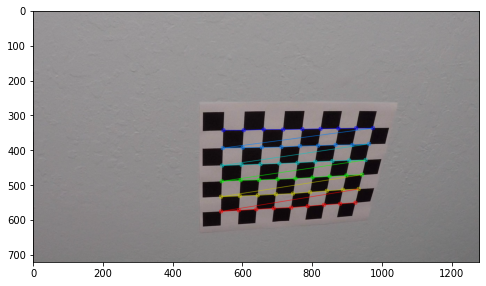

number: /home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/calibration14.jpg ret =  True


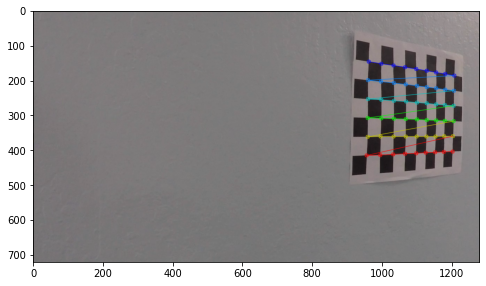

number: /home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/calibration7.jpg ret =  True


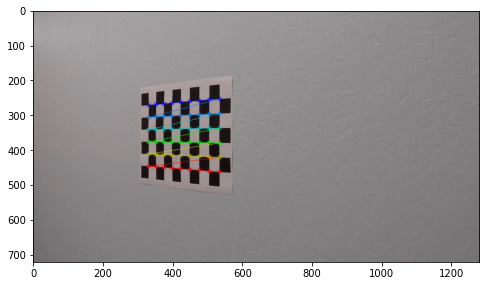

number: /home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/calibration19.jpg ret =  True


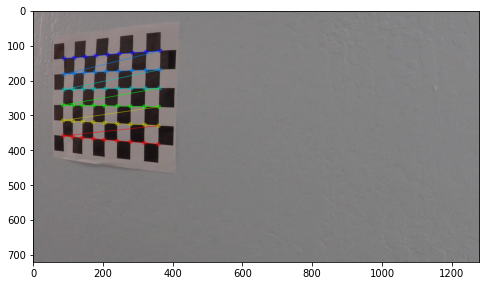

error: OpenCV(4.3.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [13]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip
from IPython.display import HTML
 
%matplotlib inline


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
 
# Make a list of calibration images
images = glob.glob('/home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/*')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    print('number:',fname,'ret = ',ret)
 
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
 
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        plt.figure(figsize = (8,8))
        plt.imshow(img)
        plt.show()
        #cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)
 
 #cv2.destroyAllWindows()

(720, 1280, 3)
(1280, 720)


True

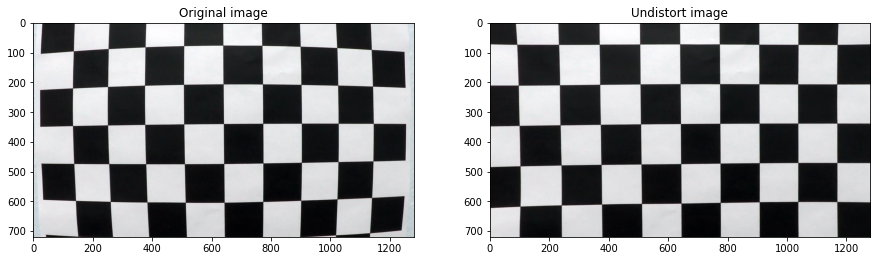

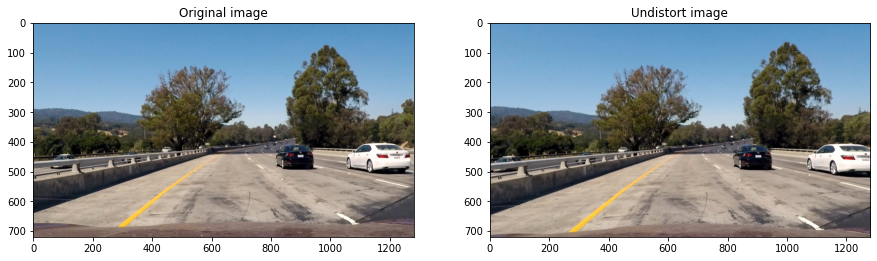

In [28]:
img = cv2.imread('/home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/calibration1.jpg')
print(img.shape)
img_size = (img.shape[1],img.shape[0])
print(img_size)
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
 
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( '/home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/wide_dist_pickle.p', 'wb' ) )

def undistort(img):
    cal_pickle = pickle.load(open('/home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/wide_dist_pickle.p', 'rb'))
    mtx = cal_pickle['mtx']
    dist = cal_pickle['dist']
    undist = cv2.undistort(img,mtx,dist,None,mtx)
    return undist

image_test = '/home/jz/Coding/CarND-Advanced-Lane-Lines-master/camera_cal/calibration1.jpg'
img_test = cv2.imread(image_test)
img_undistort = undistort(img_test)
 
plt.figure(figsize = (15,15))
plt.subplot(121)
plt.imshow(img_test)
plt.title('Original image')
 
plt.subplot(122)
plt.imshow(img_undistort)
plt.title('Undistort image')
cv2.imwrite('/home/jz/Coding/CarND-Advanced-Lane-Lines-master/output_images/undistorted_cal.png',img_undistort)


image_test = '/home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/test1.jpg'
img_test = plt.imread(image_test)
img_undistort = undistort(img_test)
 
plt.figure(figsize = (15,15))
plt.subplot(121)
plt.imshow(img_test)
plt.title('Original image')
 
plt.subplot(122)
plt.imshow(img_undistort)
plt.title('Undistort image')
cv2.imwrite('/home/jz/Coding/CarND-Advanced-Lane-Lines-master/output_images/undistorted.png',img_undistort)

True

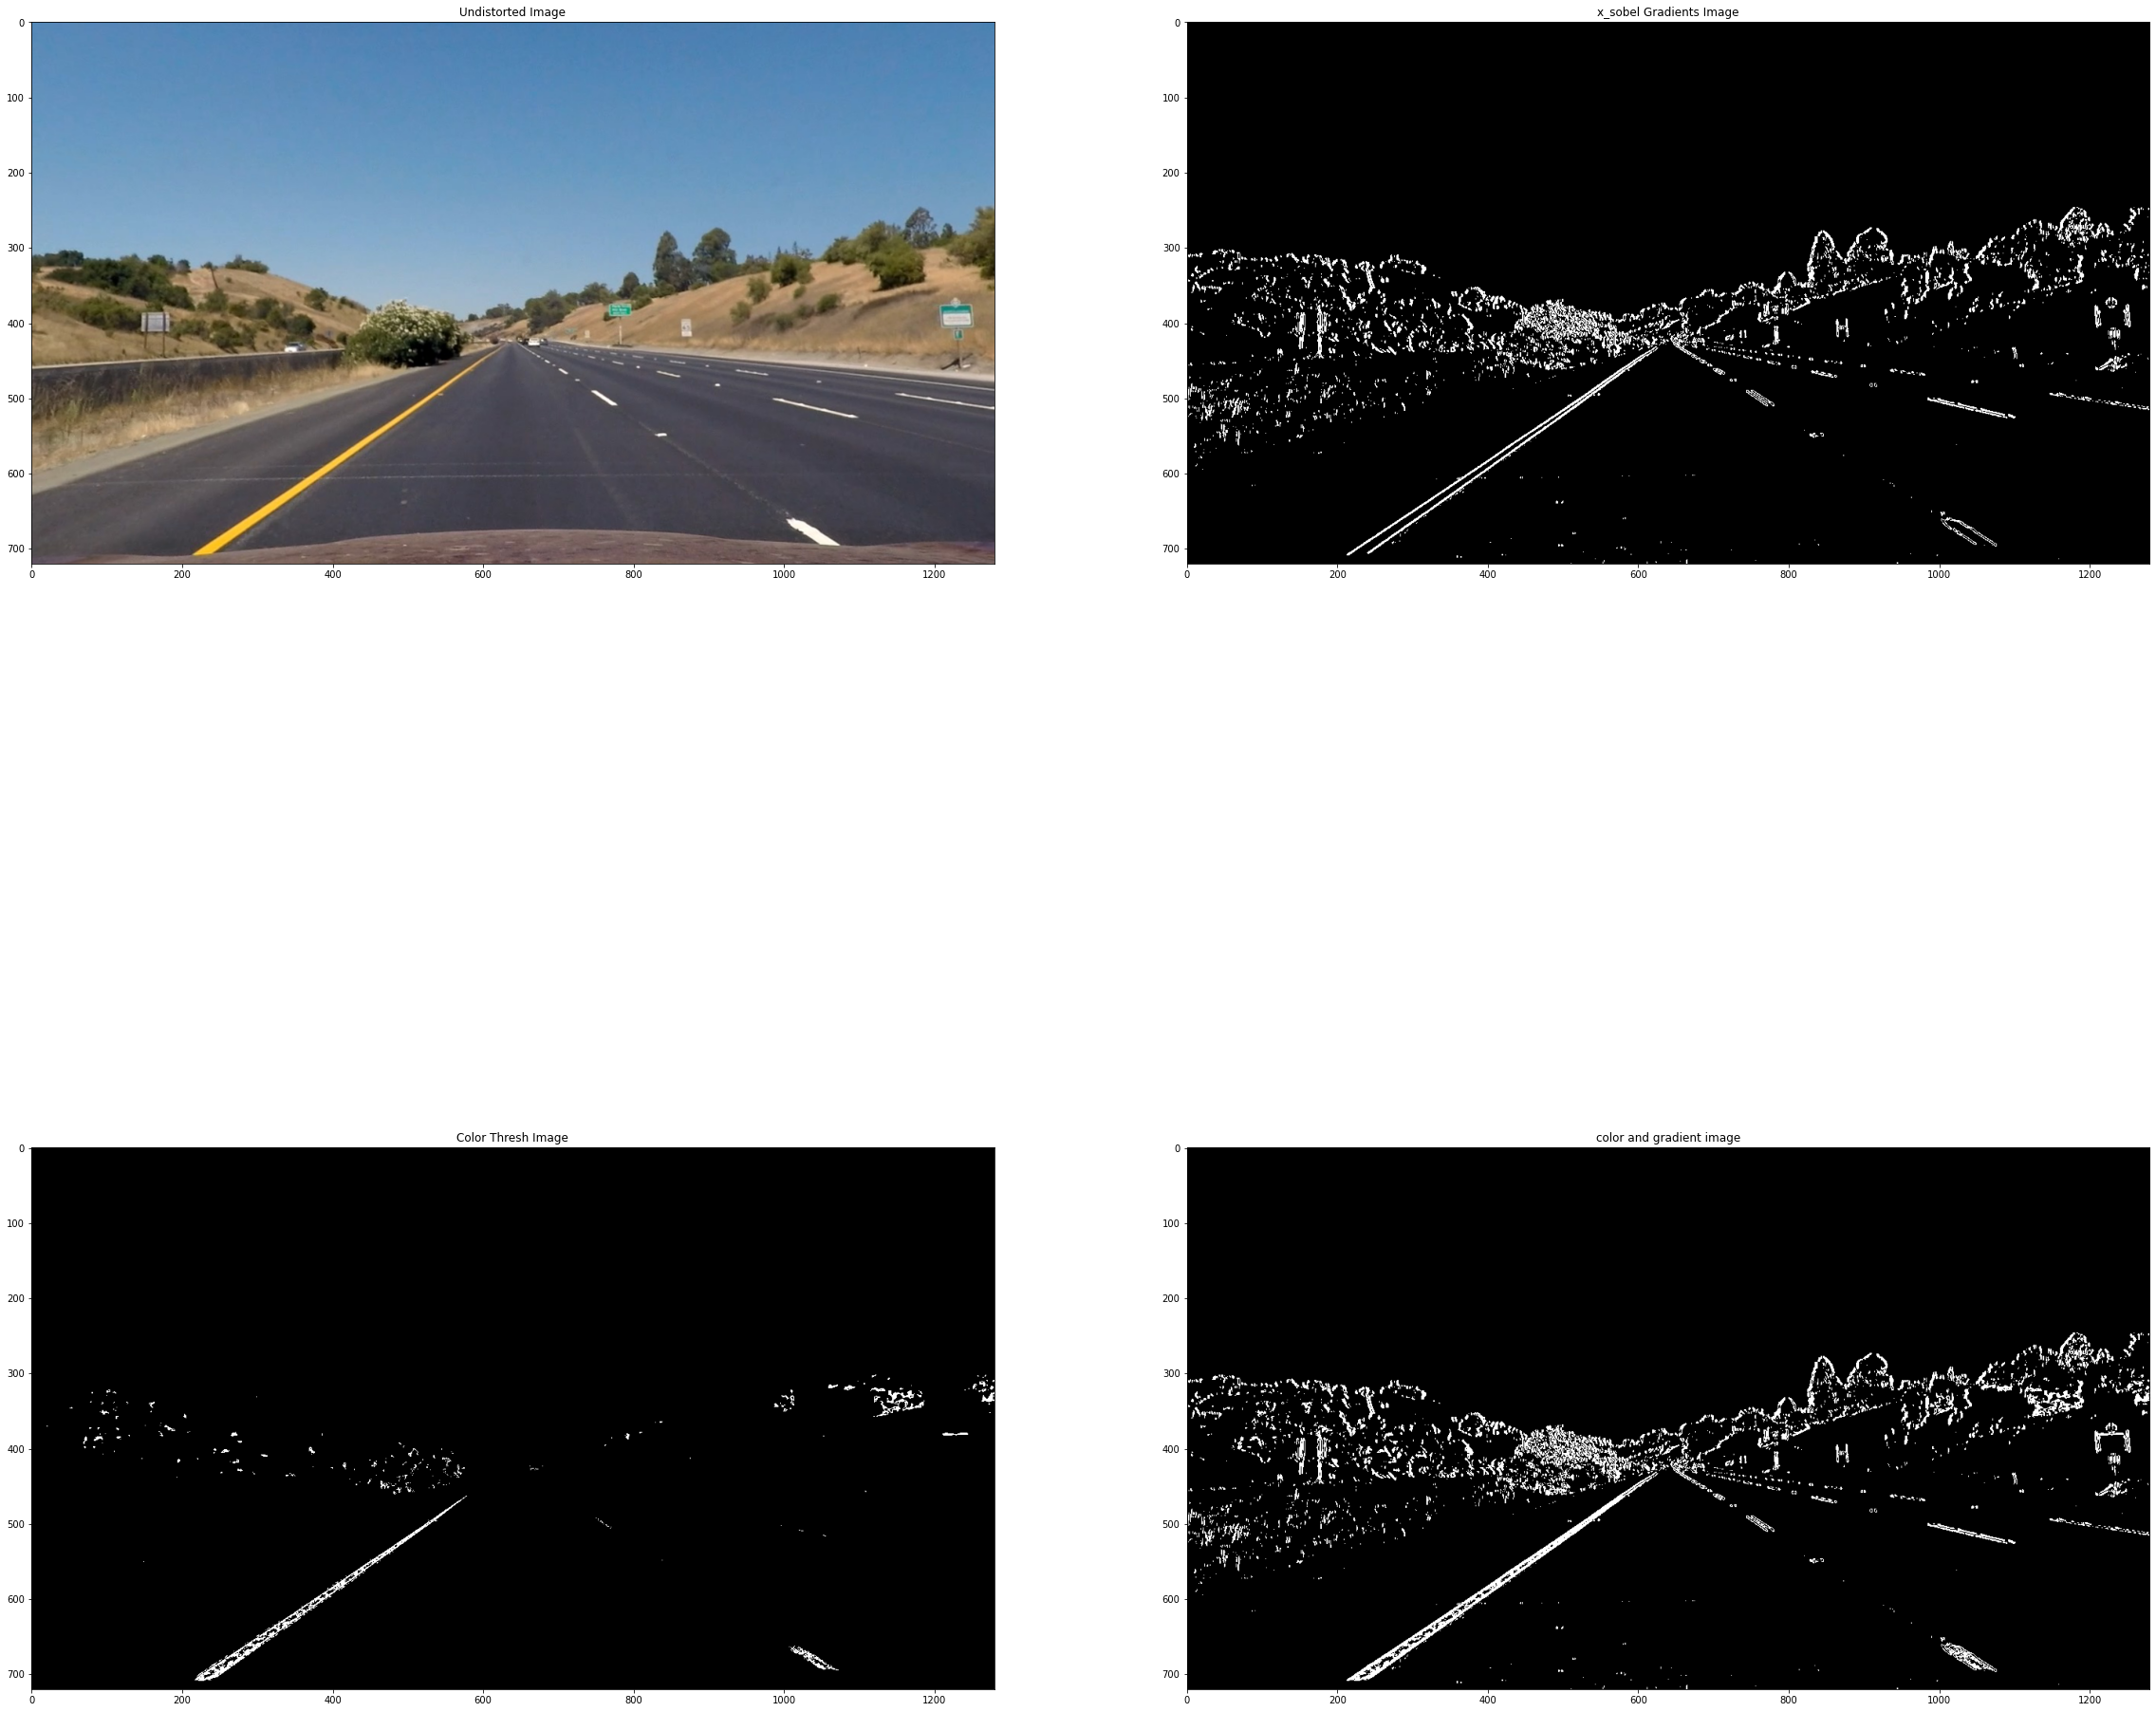

In [34]:
#define functions
def grayscale(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
def gaussian_blur(img,kernel_size):
    return cv2.GaussianBlur(img,(kernel_size,kernel_size),0)
 
def abs_sobel_thresh(img,orient = 'x',sobel_kernel = 3,thresh = (0,255)):
    gray = grayscale(img)
    
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray,cv2.CV_64F,1,0,ksize = sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray,cv2.CV_64F,0,1,ksize = sobel_kernel))
    
    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_output
 
def mag_thresh(img, sobel_kernel=3, thresh=(0, 255)):
 
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separatel
    sobel_x = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize = sobel_kernel)
    #print(sobel_x)
    sobel_y = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize = sobel_kernel)
    # 3) Calculate the magnitude 
    magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_factor = np.max(magnitude) / 255
    #print('scale_factor = ',scale_factor)
    magnitude = (magnitude / scale_factor).astype(np.uint8)
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(magnitude)
    # 6) Return this mask as your binary_output image
    binary_output[(magnitude >= thresh[0]) & (magnitude <= thresh[1])] = 1
    return binary_output
    
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    #print(absgraddir)
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
 
    # Return the binary image
    return binary_output
 
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    s_channel = hls[:,:,2]
    # 3) Return a binary image of threshold result
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <thresh[1])] = 1
    return binary_output


#read in the test picture
image_test = '/home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/straight_lines1.jpg' 
img_test = plt.imread(image_test)
plt.figure(figsize = (40,40))

#undistort the picture
undist = undistort(img_test)
plt.subplot(221)
plt.imshow(undist)
plt.title('Undistorted Image')
cv2.imwrite('/home/jz/Coding/CarND-Advanced-Lane-Lines-master/output_images/undist.jpg', undist)

#apply sobel x and take an absolue value and apply a threshold
x_sobel = abs_sobel_thresh(undist,thresh = (22,100))
plt.subplot(222)
plt.imshow(x_sobel,cmap = 'gray')
plt.title('x_sobel Gradients Image')
cv2.imwrite('/home/jz/Coding/CarND-Advanced-Lane-Lines-master/output_images/x_sobel.jpg', x_sobel)

#convert to HLS color space and apply threshold to s channel
color_transforms = hls_select(undist,thresh = (150,255))
plt.subplot(223)
plt.imshow(color_transforms, cmap = 'gray')
plt.title('Color Thresh Image')
cv2.imwrite('/home/jz/Coding/CarND-Advanced-Lane-Lines-master/output_images/color_transforms.jpg',color_transforms)

#apply color transform and x sobel in the same time
color_x_sobel = np.zeros_like(x_sobel)
color_x_sobel[(color_transforms == 1) | (x_sobel) == 1] = 1
plt.subplot(224)
plt.imshow(color_x_sobel, cmap = 'gray')
plt.title('color and gradient image')
cv2.imwrite('/home/jz/Coding/CarND-Advanced-Lane-Lines-master/output_images/color_x_sobel.jpg',color_x_sobel)


(720, 1280)


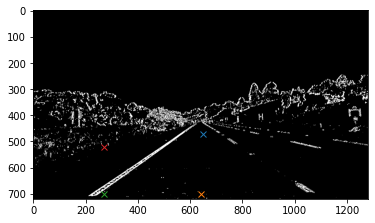

In [32]:
# Do perspective transform 
plt.imshow(color_x_sobel,cmap = 'gray')
print(color_x_sobel.shape)

# plt.plot(800,510,'x')
# plt.plot(1150,700,'x')
# plt.plot(270,700,'x')
# plt.plot(510,510,'x')
  
plt.plot(650,470,'x')
plt.plot(640,700,'x')
plt.plot(270,700,'x')
plt.plot(270,520,'x')



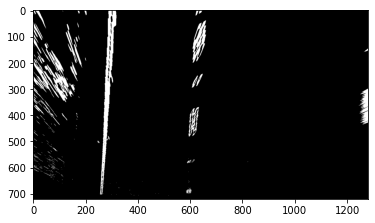

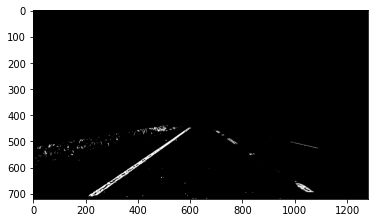

In [33]:
#apply perspective tansform and warp of the road lanes

def warp(img):
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32([[800,510],[1150,700],[270,700],[510,510]])
    dst = np.float32([[650,470],[640,700],[270,700],[270,540]])
    M = cv2.getPerspectiveTransform(src,dst)
    
    Minv = cv2.getPerspectiveTransform(dst,src)
    
    warped = cv2.warpPerspective(img,M,img_size,flags = cv2.INTER_LINEAR)
    
    unpersp = cv2.warpPerspective(warped, Minv, img_size, flags=cv2.INTER_LINEAR)
    
    return warped, unpersp, Minv


warped_img, unpersp, Minv = warp(color_x_sobel)

plt.imshow(warped_img, cmap = 'gray')
cv2.imwrite('/home/jz/Coding/CarND-Advanced-Lane-Lines-master/output_images/warped.png',warped_img)
plt.show()
plt.imshow(unpersp, cmap = 'gray')
cv2.imwrite('/home/jz/Coding/CarND-Advanced-Lane-Lines-master/output_images/unpersp.png',unpersp)
plt.show()


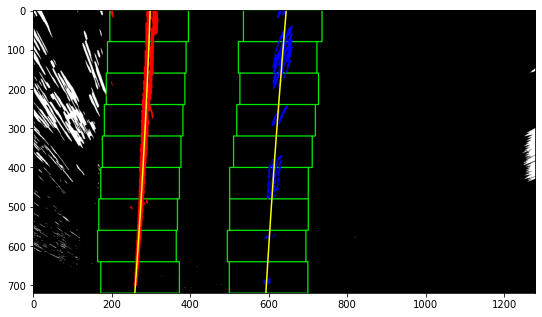

In [37]:
#detect driveline lanes pixels and find lane edges
def find_lines(img, print=True):
    
    #get the histogram of the warped binary plot
    histogram = np.sum(img[img.shape[0]//2:,:], axis = 0)
    
    #create output plot for visualized result
    out_img = np.dstack((img,img,img))*255
    
    #find the peaks for the left and right side of the histogram as the starting points of the road lanes
    midpoint = np.int(histogram.shape[0]//4)
    leftx_base = np.argmax(histogram[:midpoint]) #argmax returns the location of the max value
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint # to return the right peak position, add midpoint
    
    #choose the number of sliding windows and the height of them
    nwindows = 9
    window_height = np.int(img.shape[0] // nwindows)
    
    #find the non-zero points in the img which represents the non-black points, one line as x, theother line as y
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    #update the current locations of each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    
    #set the width of windows, find the min number of pixels detected to relocate the windows
    margin = 100
    minpix = 50
    
    #create empty lists to store the pixels of the left&right lanes
    left_lane_inds = []
    right_lane_inds = []
    
    
    #loop through all windows
    for window in range(nwindows):
        #identify the edges of window to be left&right
        win_y_low = img.shape[0] - (window + 1) * window_height
        #print('win_y_low',win_y_low)
        win_y_high = img.shape[0] - window * window_height
        win_xleft_low = leftx_current - margin
        #print('win_xleft_low',win_xleft_low)
        win_xleft_high = leftx_current + margin
        #print('win_xleft_high = ',win_xleft_high)
        win_xright_low = rightx_current - margin
        #print('win_xright_low = ',win_xright_low)
        win_xright_high = rightx_current + margin
        #print('win_xright_high = ',win_xright_high)
        
        #draw the rectangles by identifying the cross lines
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0),2)
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0),2)
 
        #plt.imshow(out_img)
        #plt.show()
        #print('left !!!! ',win_xleft_low,win_y_low,win_xleft_high,win_y_high)
        #print('right !!!!! ',win_xright_low,win_y_low,win_xright_high,win_y_high)
    
        #identify the xs and ys non-zero pixel windows 
        good_left_inds = (  (nonzeroy >= win_y_low)  & (nonzeroy < win_y_high)  
                              & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ( (nonzeroy >= win_y_low) & (nonzeroy < win_y_high) 
                              & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    
        #add the above lines to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
    
        #if the above lines exceed the min pixels, relocate the average spot for the next window
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
    
    #connect the index lists (numpy format)
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    
    #pick out the left and right pixel location
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    #least squares polynomial fitting
    left_fit = np.polyfit(lefty,leftx,2)
    right_fit = np.polyfit(righty,rightx,2)
    
    #plot
    ploty = np.linspace(0,img.shape[0]-1,img.shape[0]) # create arithmetic sequence
    left_fitx = left_fit[0] * ploty ** 2 + left_fit[1] * ploty + left_fit[2]
    right_fitx = right_fit[0] * ploty ** 2 + right_fit[1] * ploty + right_fit[2]
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    if print == True:
        plt.figure(figsize=(9,9))
        plt.imshow(out_img)
        plt.plot(left_fitx, ploty, color = 'yellow')
        plt.plot(right_fitx, ploty, color = 'yellow')
        plt.show()
        
    
    return out_img, left_fit, right_fit


find_line_imgae,left_fit,right_fit = find_lines(warped_img)    


Image name =  /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/test5.jpg


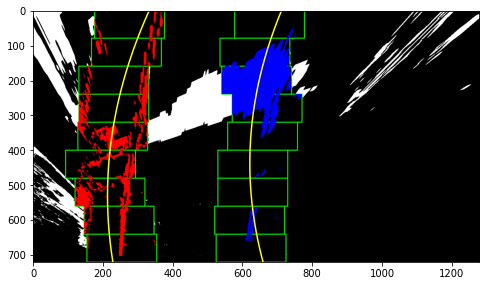

387.2624958158011 m 347.3657670979882 m -0.6230731825129544 m

Image name =  /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/straight_lines2.jpg


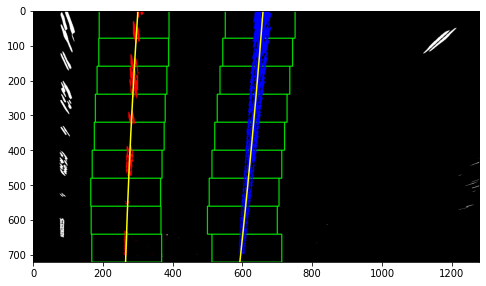

6904.242693215852 m 7987.816624184756 m -0.848373642415788 m

Image name =  /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/test4.jpg


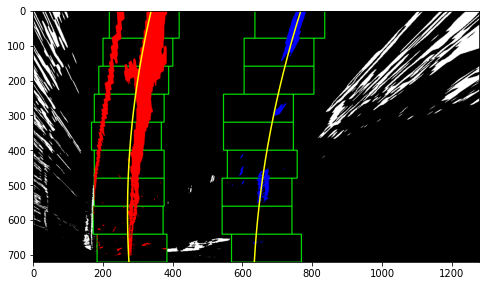

810.7759748916206 m 916.1377110967012 m -0.4612835141786482 m

Image name =  /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/test1.jpg


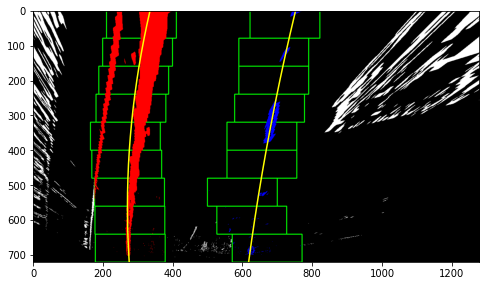

804.1859798865273 m 2220.680999183612 m -0.5103416570394826 m

Image name =  /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/test3.jpg


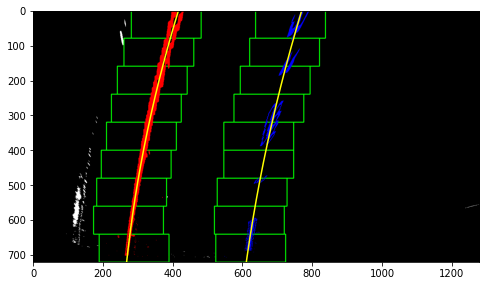

1196.1267098213846 m 1471.4656362466417 m -0.2490926030635461 m

Image name =  /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/straight_lines1.jpg


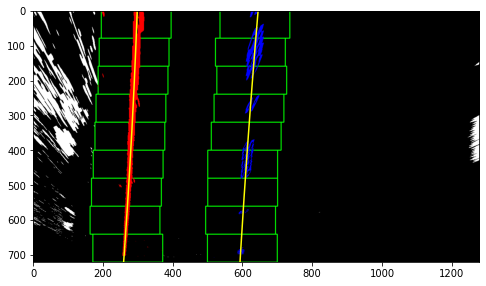

6543.18674631027 m 9283.158036289597 m -0.891086479345464 m

Image name =  /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/test2.jpg


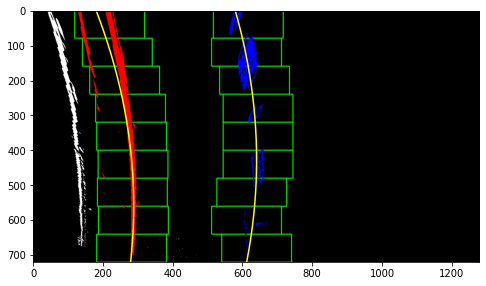

478.50435235534815 m 492.8967784903318 m -1.3749647686011477 m

Image name =  /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/test6.jpg


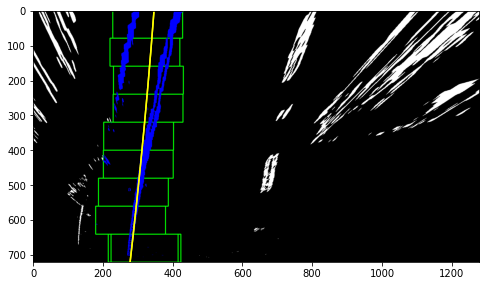

5995.62376977989 m 5995.62376977989 m -1.553012642403216 m


In [23]:
#define the curvature of the drivelane and car to the center
def curvature(left_fit, right_fit, binary_warped, print_data = True):
    ploty = np.linspace(0, binary_warped.shape[0] -1, binary_warped.shape[0])
    y_eval = np.max(ploty) #y_eval is the curvature and we are using max value
    
    ym_per_pix = 30/720 # in y direction: meter/pixel
    xm_per_pix = 3.7/700 # in x direction: meter/pixel
    
    # confirm the left and right lanes
    leftx = left_fit[0] * ploty ** 2 + left_fit[1] * ploty + left_fit[2]
    rightx = right_fit[0] * ploty ** 2 + right_fit[1] * ploty + right_fit[2]
    
    #define new coefficient in meter
    left_fit_cr = np.polyfit(ploty * ym_per_pix, leftx * xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty * ym_per_pix, rightx * xm_per_pix, 2)
    
    #calculate new curvature radius
    left_curverad = ((1 + (2 * left_fit_cr[0] * y_eval * ym_per_pix + left_fit_cr[1]) ** 2) ** 1.5) / np.absolute(2 * left_fit_cr[0])
    right_curverad = ((1 + (2 * right_fit_cr[0] * y_eval * ym_per_pix + right_fit_cr[1]) ** 2) ** 1.5) / np.absolute(2 * right_fit_cr[0])
    
    #calculate the center point which is at the center of the bottoms of left&right
    left_lane_bottom = (left_fit[0] * y_eval) ** 2 + left_fit[0] * y_eval + left_fit[2]
    right_lane_bottom = (right_fit[0] * y_eval) ** 2 + right_fit[0] * y_eval + right_fit[2]
    lane_center = (left_lane_bottom + right_lane_bottom) / 2.
    center_image = 640
    center = (lane_center - center_image) * xm_per_pix
    
    if print_data == True:
        #the curvature is in meter now
        print(left_curverad, 'm', right_curverad, 'm', center, 'm')
 
    return left_curverad, right_curverad, center




import glob
import os

new_path = os.path.join('/home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/','*.jpg')

for infile in glob.glob(new_path):
    #read in the picture
    img = plt.imread(infile)
    #undistort
    undist = undistort(img)
    #sobel
    x_sobel = abs_sobel_thresh(undist, thresh = (22,100))
    #HLS color threshold
    color_transforms = hls_select(undist, thresh = (90,255))
    #sobel and HLS together
    color_x_sobel = np.zeros_like(x_sobel)
    color_x_sobel[(color_transforms == 1) | (x_sobel) == 1] = 1
    #warp the picture
    print()
    print('Image name = ', infile)
    warped_img, unpersp, Minv = warp(color_x_sobel)
    #draw the lines
    find_line_image, left_fit, right_fit = find_lines(warped_img)
    #calculate curvature
    curvature(left_fit, right_fit, find_line_image)

the image is /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/test5.jpg


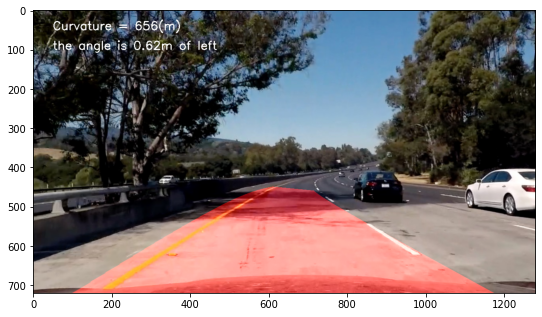

the image is /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/straight_lines2.jpg


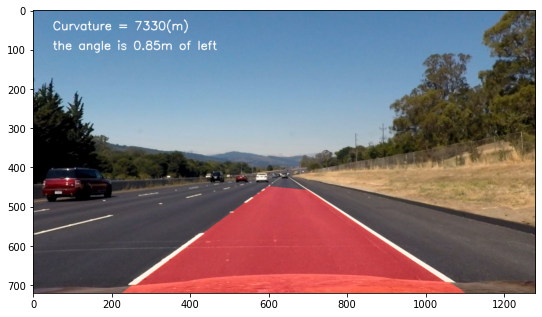

the image is /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/test4.jpg


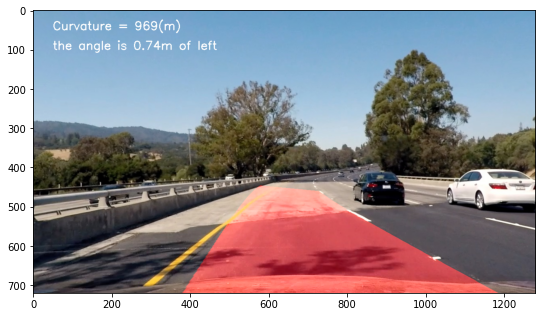

the image is /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/test1.jpg


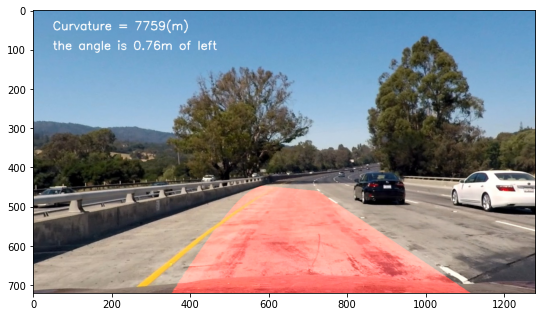

the image is /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/test3.jpg


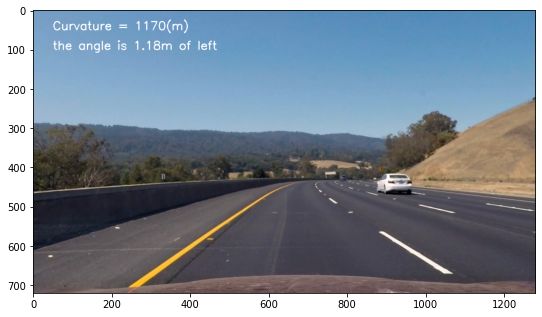

the image is /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/straight_lines1.jpg


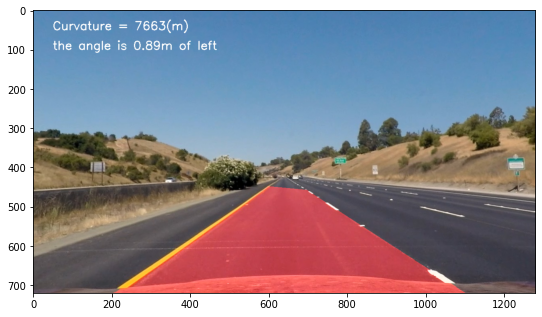

the image is /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/test2.jpg


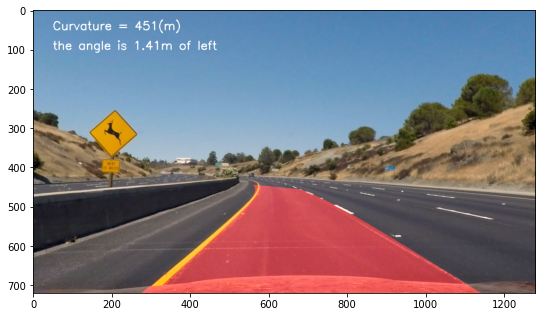

the image is /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/test6.jpg


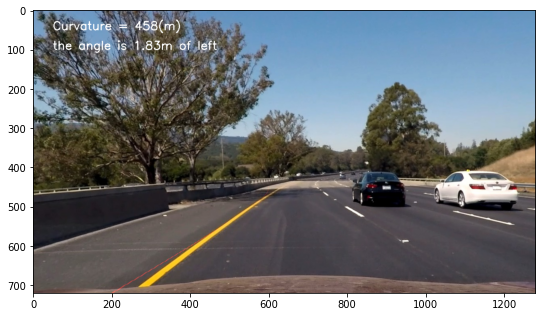

In [38]:
#twist the edges detected into the original plot
def show_info(img, left_cur,right_cur,center):
    #show the curve in the picture
    cur = (left_cur + right_cur) / 2
    
    #use font by default
    font = cv2.FONT_HERSHEY_SIMPLEX
    #pic/words/location on the left corner/font/size/color/bold
    cv2.putText(img,'Curvature = %d(m)' % cur,(50,50),font,1,(255,255,255),2)
    
    if center < 0:
        direction = 'left'
    else:
        direction = 'right'
    
    cv2.putText(img,'the angle is %.2fm of %s'%(np.abs(center),direction),(50,100),font,1,(255,255,255),2)

def draw_lines(undist, warped, left_fit, right_fit, left_cur, right_cur, center, show_img = True):
    #create a black layer to draw the lines on
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    ploty = np.linspace(0,warped.shape[0]-1,warped.shape[0])
    #add new polynomial to x and y axle
    left_fitx = left_fit[0] * ploty ** 2 + left_fit[1] * ploty + left_fit[2]
    right_fitx = right_fit[0] * ploty ** 2 + right_fit[1] * ploty + right_fit[2]
    
    #change x and y into usable form
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    #flip the array up and down
    pts = np.hstack((pts_left, pts_right))
    #fill the pic
    cv2.fillPoly(color_warp, np.int_([pts]), (255,0,0))
    #perspective transform
    newwarp = cv2.warpPerspective(color_warp, Minv, (color_warp.shape[1], color_warp.shape[0]))
    #add on the layer of line
    result = cv2.addWeighted(undist, 1, newwarp, 0.5, 0)
    show_info(result, left_cur, right_cur, center)
    if show_img == True:
        plt.figure(figsize = (9,9))
        plt.imshow(result)
        plt.show()
    return result

import glob
import os
new_path = os.path.join('/home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_images/', '*.jpg')
for infile in glob.glob(new_path):
    print('the image is', infile)
    #read in the picture
    img = plt.imread(infile)
    #undistort
    undist = undistort(img)
    #sobel
    x_sobel = abs_sobel_thresh(undist, thresh = (22, 100))
    #mag_thresh
    mag_binary = mag_thresh(undist, thresh = (30, 90))
    #dir_threshold
    dir_binary = dir_threshold(undist, sobel_kernel = 15, thresh = (0.7, 1.3))
    #hls color threshold
    color_transforms = hls_select(undist, thresh = (150, 255))
    #sobel & hls
    color_x_sobel = np.zeros_like(x_sobel)
    color_x_sobel[(x_sobel == 1) | (color_transforms == 1)] = 1
    #warp the img
    warped_img, unpersp, Minv = warp(color_x_sobel)
    #draw the lines
    find_line_imgae,left_fit,right_fit = find_lines(warped_img,print = False)
    #calculate the curvature
    left_curverad, right_curverad, center = curvature(left_fit,right_fit,find_line_imgae,print_data = False)
    #plot
    result = draw_lines(undist,warped_img,left_fit,right_fit,left_curverad,right_curverad,center)
    
    

In [26]:
#output the visible edges of drive lanes & curvature & numerical estimation of the location of car
def check(left_fit, right_fit):
    #Performs a sanity check on the lanes
 
    #1. Check if left and right fit returned a value
    if len(left_fit) ==0 or len(right_fit) == 0:
        status = False
 
    else:
        #Check distance b/w lines
        ploty = np.linspace(0, 20, num=10 )
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        delta_lines = np.mean(right_fitx - left_fitx)
        if delta_lines >= 150 and delta_lines <=430: #apprrox delta in pixels
            status = True
        else:
            status = False
        
         #Calculate slope of left and right lanes at midpoint of y (i.e. 360)
         #L_0 = 2*left_fit[0]*360+left_fit[1]
         #R_0 = 2*right_fit[0]*360+right_fit[1]
         #delta_slope_mid =  np.abs(L_0-R_0)
        
         # Calculate slope of left and right lanes at top of y (i.e. 720)
         #L_1 = 2*left_fit[0]*720+left_fit[1]
         #R_1 = 2*right_fit[0]*720+right_fit[1]
         #delta_slope_top =  np.abs(L_1-R_1)
        
         #Check if lines are parallel at the middle
        
         #if delta_slope_mid<=0.1:
             #status = True
         #else:
             #status = False
            
    return status


def process_video(img):
    global last_left 
    global last_right
    global left_fit
    global right_fit
    
    
    undist = undistort(img)
    
    x_sobel = abs_sobel_thresh(undist,thresh = (22,100))
    
    color_transforms = hls_select(undist,thresh=(150,255))
    
    color_x_sobel = np.zeros_like(x_sobel)
    color_x_sobel[ (x_sobel == 1) | (color_transforms == 1) ] = 1
    
    
    warped_img, unpersp, Minv = warp(color_x_sobel)
    
    
    find_line_imgae,left_fit,right_fit = find_lines(warped_img,print = False)
    
    
    status = check(left_fit,right_fit)
    
    
    if status == True:
        last_left , last_right = left_fit,right_fit
    else:
        left_fit,right_fit = last_left,last_right
        
    
    left_curverad, right_curverad, center = curvature(left_fit,right_fit,find_line_imgae,print_data = False)
    
    result = draw_lines(undist,warped_img,left_fit,right_fit,left_curverad,right_curverad,center,show_img=False)
    
    return result


#Create video file pipeline
output = '/home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_video.mp4'
clip1 = VideoFileClip('/home/jz/Coding/CarND-Advanced-Lane-Lines-master/project_video.mp4')
#clip1 = VideoFileClip("project_video.mp4").subclip(20,28)
 
out_clip = clip1.fl_image(process_video) #NOTE: this function expects color images!!
%time out_clip.write_videofile(output, audio=False)

t:   0%|          | 3/1260 [00:00<01:10, 17.73it/s, now=None]

Moviepy - Building video /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_video.mp4.
Moviepy - Writing video /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_video.mp4



Moviepy - Done !
Moviepy - video ready /home/jz/Coding/CarND-Advanced-Lane-Lines-master/test_video.mp4
CPU times: user 2min 52s, sys: 2min 36s, total: 5min 28s
Wall time: 1min 2s
